In [3]:
%%html
<style>@font-face{font-family:myFont;src:url(v.ttf)}div.text_cell{font-family:myFont;direction:rtl;text-align:center;}</style>

# «به نام خدا»
## هوش مصنوعی 
## تمرین کامپیوتری شماره پنج - فاز دوم
## بررسی برخی از مسائل شبکه های عصبی به کمک Tensorflow
### امیرحسین دبیری اقدم - 810098024
### استاد: دکتر فدایی
#####  دانشگاه تهران - پاییز 99
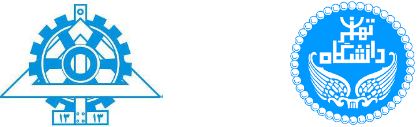
***

<h2 dir="rtl" style="text-align: center;">مقدمه</h2>
<p dir="rtl" style="text-align: right;">در این پروژه با کتابخانه TensorFlow و با استفاده از رابط سطح بالای Keras برخی از مسائل مربوط به شبک ههای عصبی را بررسی کردیم.</p>
<p dir="rtl" style="text-align: right;">به این ترتیب که با استفاده از شبکه های عصبی وجود بیماری Covid19 یا ذات الریه را در تصاویرسیتی اسکن مربوط به بیمارانی که به مرکز درمانی مراجعه کرده اند تشخیص دادیم.</p>

## پیاده سازی پروژه

## Part 1 
ایمپورت کردن داده ها و کتابخانه های مورد نیاز
---



In [13]:
from tensorflow.keras import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
plt.style.use('seaborn')

In [14]:
dataGenarator = preprocessing.image.ImageDataGenerator()

In [15]:
train_data = dataGenarator.flow_from_directory("/content/Data/train",
                                               target_size=(80,80), 
                                               color_mode='grayscale',
                                               batch_size = 32
                                              )

test_data = dataGenarator.flow_from_directory("/content/Data/test",
                                               target_size=(80,80), 
                                               color_mode='grayscale',
                                               batch_size = 32
                                              )

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


## Part 2

---



<h2 dir="rtl" style="text-align: right;">I.</h2>

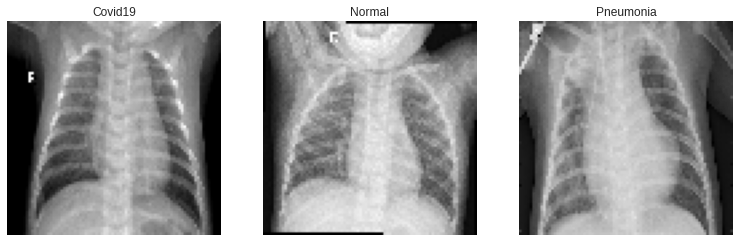

In [16]:
classes = ['Covid19', 'Normal', 'Pneumonia']
l = [2, 0, 1]
fig, axs = plt.subplots(1,3, figsize=(13,13))
for i in range(3):
    image = train_data[0][0][l[i]]
    im = np.reshape(image, (80,80))
    axs[i].imshow(im, cmap='gray')
    axs[i].title.set_text(classes[i])
    axs[i].grid(False)
    axs[i].axis(False)

plt.show()

<h2 dir="rtl" style="text-align: right;">II.</h2>

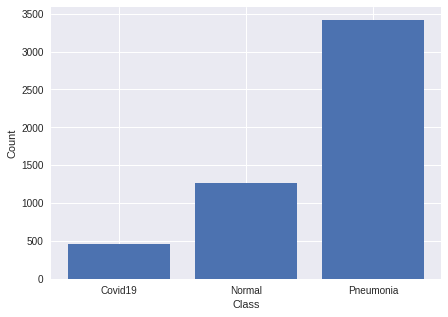

In [17]:
#Train data
count = np.unique(train_data.labels, return_counts=1)
plt.figure(figsize=[7,5])
plt.bar(classes,[count[1][0], count[1][1], count[1][2]])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

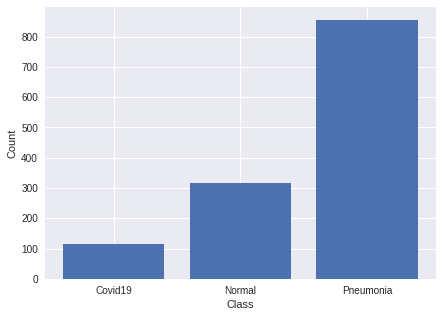

In [18]:
#Test data
count = np.unique(test_data.labels, return_counts=1)
plt.figure(figsize=[7,5])
plt.bar(classes,[count[1][0], count[1][1], count[1][2]])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## Part 3

---



In [93]:
#Utility Functions
def create_net(activation = activations.relu, optimizer = optimizers.SGD(learning_rate=0.01), loss = losses.categorical_crossentropy, bias_regularizer = None,  kernel_regularizer = None, Dropout = False):
  inp = layers.Input(shape=(80,80,1))
  out = layers.Flatten()(inp)
  out = layers.Dense(1024, activation=activation ,bias_regularizer=bias_regularizer, kernel_regularizer=kernel_regularizer)(out)
  if(Dropout): out = layers.Dropout(0.1)(out)
  out = layers.Dense(1024, activation=activation, bias_regularizer=bias_regularizer, kernel_regularizer=kernel_regularizer)(out)
  if(Dropout): out = layers.Dropout(0.1)(out)
  out = layers.Dense(3, activation=activations.softmax, bias_regularizer=bias_regularizer, kernel_regularizer=kernel_regularizer)(out)
  model = models.Model(inputs=inp, outputs=out)
  model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
  model.summary()
  return model

def plot_history(history):
  fig, axs = plt.subplots(1, 2, figsize=(14, 6))
  axs[0].plot(history.history['loss'])
  axs[0].plot(history.history['val_loss'])
  axs[0].set_title('model loss')
  axs[0].set_ylabel('loss')
  axs[0].set_xlabel('epoch')
  axs[0].legend(['train', 'test'])

  axs[1].plot(history.history['accuracy'])
  axs[1].plot(history.history['val_accuracy'])
  axs[1].set_title('model accuracy')
  axs[1].set_ylabel('accuracy')
  axs[1].set_xlabel('epoch')
  axs[1].legend(['train', 'test'])

def predict_report(model, data):
  classes = ['Covid19', 'Normal', 'Pneumonia']
  labels = list()
  y_pred = list()
  for _ in range(len(data)):
      X, y = data.next()
      y_pred.extend(model.predict(X))
      labels.extend(np.argmax(y, axis=1))
    
  print(classification_report(labels, np.argmax(y_pred, axis=1), target_names=classes))  

In [20]:
model_relu = create_net(activation=activations.relu)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              6554624   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


<p dir="rtl" style="text-align: right;">تعداد پارامترهای هر لایه مربوط به وزنهای و بایاس هاست که تعداد بایاس ها برابر تعداد نرونهای هر لایه&nbsp; و تعداد وزنها برابر با تعداد نورونهای هر لایه ضربدر تعداد ورودی های لایه(تعداد خروجی یا همان نورون های لایه قبل است) که البته لایه flatten&nbsp; بایاس ندارد و تعداد ورودی هایش همان تعداد نورونهایش است زیرا که فقط کار آن flat کردن عکس ورودی است.</p>

## Part 4

---



<h2 dir="rtl" style="text-align: right;">I.</h2>

In [21]:
history_relu = model_relu.fit(train_data, validation_data=test_data,epochs=10)

Epoch 1/10
161/161 [==============================] - 180s 1s/step - loss: nan - accuracy: 0.1457 - val_loss: nan - val_accuracy: 0.0901
Epoch 2/10
161/161 [==============================] - 176s 1s/step - loss: nan - accuracy: 0.0860 - val_loss: nan - val_accuracy: 0.0901
Epoch 3/10
161/161 [==============================] - 176s 1s/step - loss: nan - accuracy: 0.0923 - val_loss: nan - val_accuracy: 0.0901
Epoch 4/10
161/161 [==============================] - 176s 1s/step - loss: nan - accuracy: 0.0875 - val_loss: nan - val_accuracy: 0.0901
Epoch 5/10
161/161 [==============================] - 177s 1s/step - loss: nan - accuracy: 0.0879 - val_loss: nan - val_accuracy: 0.0901
Epoch 6/10
161/161 [==============================] - 178s 1s/step - loss: nan - accuracy: 0.0886 - val_loss: nan - val_accuracy: 0.0901
Epoch 7/10
161/161 [==============================] - 178s 1s/step - loss: nan - accuracy: 0.0888 - val_loss: nan - val_accuracy: 0.0901
Epoch 8/10
161/161 [=====================

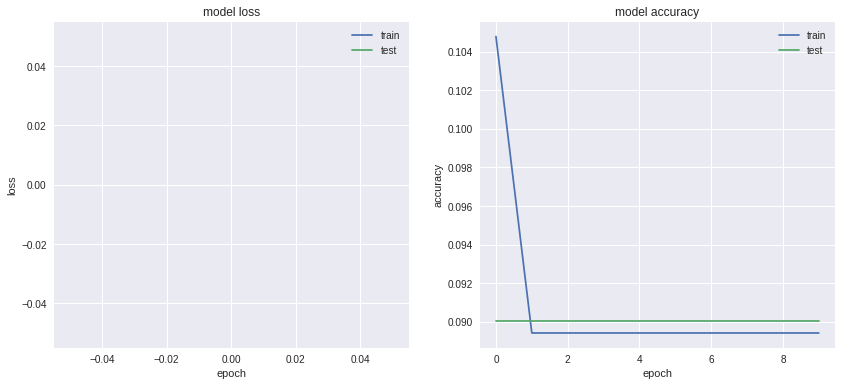

In [22]:
plot_history(history_relu)

In [23]:
 #Train data
 predict_report(model_relu, train_data)

              precision    recall  f1-score   support

     Covid19       0.09      1.00      0.16       460
      Normal       0.00      0.00      0.00      1266
   Pneumonia       0.00      0.00      0.00      3418

    accuracy                           0.09      5144
   macro avg       0.03      0.33      0.05      5144
weighted avg       0.01      0.09      0.01      5144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#Test data
predict_report(model_relu, test_data)

              precision    recall  f1-score   support

     Covid19       0.09      1.00      0.17       116
      Normal       0.00      0.00      0.00       317
   Pneumonia       0.00      0.00      0.00       855

    accuracy                           0.09      1288
   macro avg       0.03      0.33      0.06      1288
weighted avg       0.01      0.09      0.01      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<p dir="rtl" style="text-align: right;">مشاهده میشود که چون داده ها نرمال نشده اند شبکه به درستی ترین نمیشود و عملکرد درستی ندارد و همه ورودی ها را covid19 تشخیص میدهد که علت ترین نشدن بزرگ بودن ورودی ها و ... است که باعث ناپایداری سیستم شده و باعث gradient explosion شده است و به دلیل مشابه میبینم که مقدار loss نامعین (nan) شده است (زیرا در هنگام محاسبه سافت مکس مقدار ورودی آن انقدر بزرگ میشود که مقدار exp آن خیلی بزرگ میشود و...).</p>

<h2 dir="rtl" style="text-align: right;">II.</h2>

In [27]:
model_tanh = create_net(activation=activations.tanh)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              6554624   
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


In [28]:
history_tanh = model_tanh.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
161/161 [==============================] - 173s 1s/step - loss: 1.5302 - accuracy: 0.5548 - val_loss: 0.8506 - val_accuracy: 0.6638
Epoch 2/10
161/161 [==============================] - 173s 1s/step - loss: 1.0459 - accuracy: 0.5840 - val_loss: 0.9932 - val_accuracy: 0.6638
Epoch 3/10
161/161 [==============================] - 174s 1s/step - loss: 0.9333 - accuracy: 0.6063 - val_loss: 0.9950 - val_accuracy: 0.2461
Epoch 4/10
161/161 [==============================] - 173s 1s/step - loss: 0.9391 - accuracy: 0.6028 - val_loss: 0.8600 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 173s 1s/step - loss: 0.9222 - accuracy: 0.6088 - val_loss: 0.9515 - val_accuracy: 0.2469
Epoch 6/10
161/161 [==============================] - 174s 1s/step - loss: 0.9049 - accuracy: 0.6144 - val_loss: 0.9315 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 175s 1s/step - loss: 0.9055 - accuracy: 0.6120 - val_loss: 0.8908 - val_accuracy: 0.6638

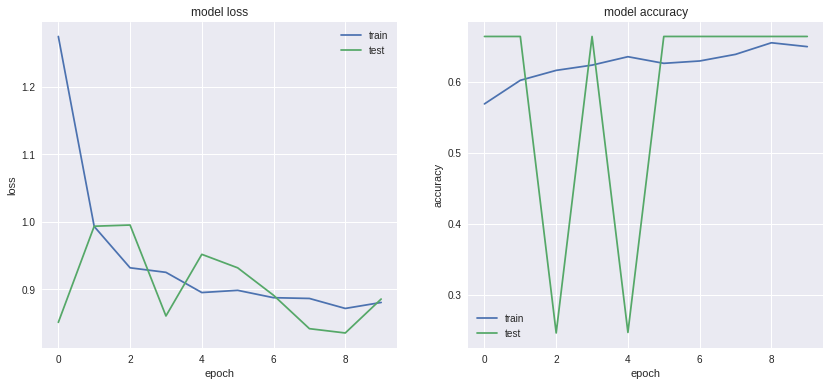

In [29]:
plot_history(history_tanh)

In [31]:
#Train data
predict_report(model_tanh, train_data)

              precision    recall  f1-score   support

     Covid19       0.00      0.00      0.00       460
      Normal       0.00      0.00      0.00      1266
   Pneumonia       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#Test data
predict_report(model_tanh, test_data)

              precision    recall  f1-score   support

     Covid19       0.00      0.00      0.00       116
      Normal       0.00      0.00      0.00       317
   Pneumonia       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<p dir="rtl" style="text-align: right;">مانند قسمت قبل مشاهده میشود که چون داده ها نرمال نشده اند شبکه به درستی ترین نمیشود و عملکرد درستی ندارد و البته در اینجا همه ورودی ها را ذات الریه تشخیص میدهد که علت ترین نشدن بزرگ بودن ورودی ها و ... است که باعث ناپایداری سیستم شده است.</p>

<h2 dir="rtl" style="text-align: right;">III.</h2>

<p dir="rtl" style="text-align: right;">در هردو حالت میبینیم که مدل به درستی عمل نمیکند چون درست ترین نمیشود زیرا که ورودی ها نرمالایز نشده اند و باعث gradient explosion و... شده است اما تفاوتی که وجود دارد این است که در هنگام استفاده از relu چون خروجی آن bounded نیست باعث شده که تابع softmax اصطلاحا به اشباع برود و در نتیجه در هنگام محاسبه loss به nan برسیم اما tanh به دلیل اینکه خروجی اش بین -1 تا 1 است (bounded است) این مشکل بوجود نمیاید و هنگام محاسبه loss به nan نمیرسیم اما در هر صورت چون داده ها نرمالایز نشده شبکه به درستی ترین نمیشود و احتمالا وزنهای آن و نیز بایاس آن مقدار بزرگی دارد و در کل شبکه ناپایدار است و عملکرد نامطلوب دارد.</p>

## Part5

---



In [36]:
dataGenarator_normal = preprocessing.image.ImageDataGenerator(rescale=1.0/255)

In [37]:
train_data_normal = dataGenarator_normal.flow_from_directory("/content/Data/train",
                                               target_size=(80,80), 
                                               color_mode='grayscale',
                                               batch_size = 32
                                              )


Found 5144 images belonging to 3 classes.


In [38]:
test_data_normal = dataGenarator_normal.flow_from_directory("/content/Data/test",
                                               target_size=(80,80), 
                                               color_mode='grayscale',
                                               batch_size = 32
                                              )


Found 1288 images belonging to 3 classes.


In [39]:
model_relu_normal = create_net(activation=activations.relu)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              6554624   
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


In [40]:
history_relu_normal = model_relu_normal.fit(train_data_normal, validation_data=test_data_normal,epochs=10)

Epoch 1/10
161/161 [==============================] - 173s 1s/step - loss: 0.7170 - accuracy: 0.6878 - val_loss: 0.4219 - val_accuracy: 0.7974
Epoch 2/10
161/161 [==============================] - 172s 1s/step - loss: 0.4231 - accuracy: 0.8323 - val_loss: 0.3457 - val_accuracy: 0.8734
Epoch 3/10
161/161 [==============================] - 172s 1s/step - loss: 0.3441 - accuracy: 0.8696 - val_loss: 0.2352 - val_accuracy: 0.9185
Epoch 4/10
161/161 [==============================] - 172s 1s/step - loss: 0.3036 - accuracy: 0.8757 - val_loss: 0.2314 - val_accuracy: 0.9138
Epoch 5/10
161/161 [==============================] - 167s 1s/step - loss: 0.2683 - accuracy: 0.8981 - val_loss: 0.1872 - val_accuracy: 0.9363
Epoch 6/10
161/161 [==============================] - 170s 1s/step - loss: 0.2580 - accuracy: 0.9003 - val_loss: 0.2063 - val_accuracy: 0.9200
Epoch 7/10
161/161 [==============================] - 167s 1s/step - loss: 0.2533 - accuracy: 0.9011 - val_loss: 0.1831 - val_accuracy: 0.9332

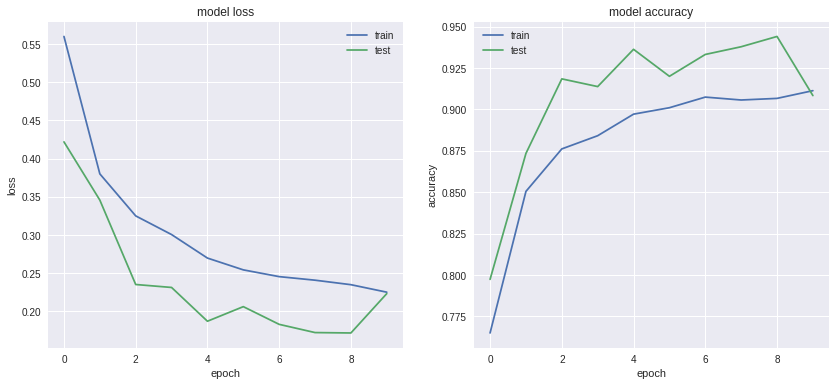

In [41]:
plot_history(history_relu_normal)

In [42]:
# Train Data
predict_report(model_relu_normal, train_data_normal)

              precision    recall  f1-score   support

     Covid19       0.96      0.81      0.88       460
      Normal       0.95      0.68      0.79      1266
   Pneumonia       0.88      0.99      0.93      3418

    accuracy                           0.90      5144
   macro avg       0.93      0.83      0.87      5144
weighted avg       0.90      0.90      0.89      5144



In [43]:
# Test Data
predict_report(model_relu_normal, test_data_normal)

              precision    recall  f1-score   support

     Covid19       1.00      0.80      0.89       116
      Normal       0.95      0.72      0.82       317
   Pneumonia       0.89      0.99      0.94       855

    accuracy                           0.91      1288
   macro avg       0.95      0.84      0.88      1288
weighted avg       0.91      0.91      0.90      1288



<p dir="rtl" style="text-align: right;">مشاهده میشود که با همان ساختاری که داشتیم وقتی داده ها را نرمالایز کنیم شبکه به خوبی ترین میشود و مقدار f1 آن 89% شده است که مقدار قابل قبولی است.</p>

## Part 6
---

<h2 dir="rtl" style="text-align: right;">I.</h2>

<p dir="rtl" style="text-align: right;">momentum یا تکانه از همان تکانه که در فیریک داریم ایده و مفهومش گرفته شده و به نوعی یک سرعت اولیه است که باعث میشود مدل ما در لوکال مینیمم گیر نکند و وقتی داخل آنها قرار گرفت با وجود اینکه gradient صفر میشود اما چون سرعت دارد از آن خارج میشود پس با تنظیم درست مقدار آن به میتوان سرعت همگرایی را افزایش داد و از افتادن در مینیمم محلی جلوگیری کرد البته اگر مقدار آن بیش از حد زیاد باشد ایجاد مشکل میکند زیرا ممکن است مدل به طور کلی همگرا نشود و از مینمم اپتیمال هم خارج شود...</p>
<p dir="rtl" style="text-align: right;">به طور کلی تکانه مقداری بین 0 و 1 دارد و در هنگام آپدیت کردن پارامتر ها، مقدار قبلی هر پارامتر در تکانه ضرب میشود(مانند سرعت اولیه است تا حدودی) و با gradient و ... مقدار جدید هر پارامتر را میسازند</p>

<h2 dir="rtl" style="text-align: right;">II.</h2>

In [54]:
model_momentum_5 = create_net(activation=activations.relu, optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5))

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              6554624   
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


In [55]:
history_momentum_5 = model_momentum_5.fit(train_data_normal, validation_data=test_data_normal, epochs=10)

Epoch 1/10
161/161 [==============================] - 172s 1s/step - loss: 0.6455 - accuracy: 0.7356 - val_loss: 0.4398 - val_accuracy: 0.8043
Epoch 2/10
161/161 [==============================] - 170s 1s/step - loss: 0.3349 - accuracy: 0.8673 - val_loss: 0.2880 - val_accuracy: 0.8812
Epoch 3/10
161/161 [==============================] - 171s 1s/step - loss: 0.2833 - accuracy: 0.8866 - val_loss: 0.2833 - val_accuracy: 0.8866
Epoch 4/10
161/161 [==============================] - 171s 1s/step - loss: 0.2857 - accuracy: 0.8923 - val_loss: 0.1835 - val_accuracy: 0.9332
Epoch 5/10
161/161 [==============================] - 171s 1s/step - loss: 0.2405 - accuracy: 0.9119 - val_loss: 0.3065 - val_accuracy: 0.8766
Epoch 6/10
161/161 [==============================] - 171s 1s/step - loss: 0.2505 - accuracy: 0.9017 - val_loss: 0.2472 - val_accuracy: 0.8983
Epoch 7/10
161/161 [==============================] - 170s 1s/step - loss: 0.2390 - accuracy: 0.9069 - val_loss: 0.1988 - val_accuracy: 0.9231

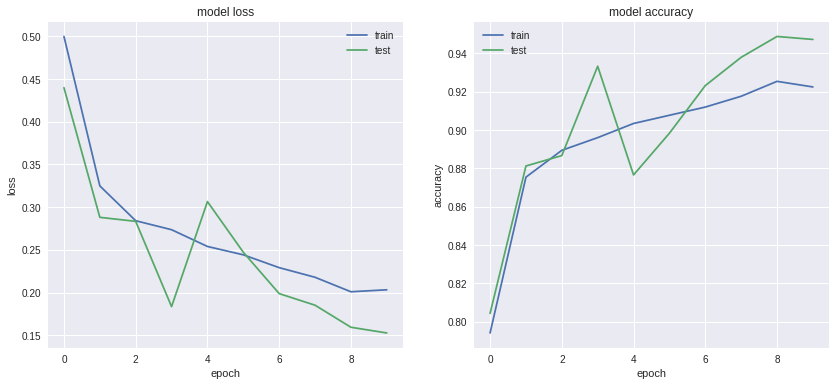

In [56]:
plot_history(history_momentum_5)

In [57]:
# Train Data
predict_report(model_momentum_5, train_data_normal)

              precision    recall  f1-score   support

     Covid19       0.93      0.91      0.92       460
      Normal       0.91      0.89      0.90      1266
   Pneumonia       0.96      0.96      0.96      3418

    accuracy                           0.94      5144
   macro avg       0.93      0.92      0.93      5144
weighted avg       0.94      0.94      0.94      5144



In [58]:
# Test Data
predict_report(model_momentum_5, test_data_normal)

              precision    recall  f1-score   support

     Covid19       0.93      0.93      0.93       116
      Normal       0.91      0.91      0.91       317
   Pneumonia       0.96      0.96      0.96       855

    accuracy                           0.95      1288
   macro avg       0.93      0.94      0.93      1288
weighted avg       0.95      0.95      0.95      1288



In [59]:
model_momentum_9 = create_net(activation=activations.relu, optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9))

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              6554624   
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


In [60]:
history_momentum_9 = model_momentum_9.fit(train_data_normal, validation_data=test_data_normal, epochs=10)

Epoch 1/10
161/161 [==============================] - 173s 1s/step - loss: 0.7377 - accuracy: 0.6996 - val_loss: 0.4058 - val_accuracy: 0.8362
Epoch 2/10
161/161 [==============================] - 171s 1s/step - loss: 0.3325 - accuracy: 0.8758 - val_loss: 0.1964 - val_accuracy: 0.9348
Epoch 3/10
161/161 [==============================] - 171s 1s/step - loss: 0.3236 - accuracy: 0.8814 - val_loss: 0.2092 - val_accuracy: 0.9293
Epoch 4/10
161/161 [==============================] - 170s 1s/step - loss: 0.2726 - accuracy: 0.8981 - val_loss: 0.1976 - val_accuracy: 0.9293
Epoch 5/10
161/161 [==============================] - 171s 1s/step - loss: 0.2728 - accuracy: 0.8937 - val_loss: 0.1814 - val_accuracy: 0.9309
Epoch 6/10
161/161 [==============================] - 172s 1s/step - loss: 0.2676 - accuracy: 0.8949 - val_loss: 0.1873 - val_accuracy: 0.9387
Epoch 7/10
161/161 [==============================] - 172s 1s/step - loss: 0.2335 - accuracy: 0.9090 - val_loss: 0.2237 - val_accuracy: 0.9099

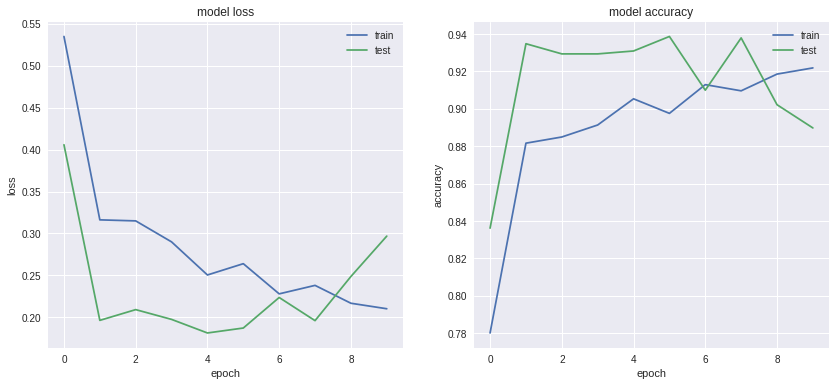

In [61]:
plot_history(history_momentum_9)

In [62]:
predict_report(model_momentum_9, train_data_normal)

              precision    recall  f1-score   support

     Covid19       0.97      0.81      0.89       460
      Normal       0.67      0.97      0.79      1266
   Pneumonia       0.97      0.83      0.90      3418

    accuracy                           0.86      5144
   macro avg       0.87      0.87      0.86      5144
weighted avg       0.90      0.86      0.87      5144



In [63]:
predict_report(model_momentum_9, test_data_normal)

              precision    recall  f1-score   support

     Covid19       1.00      0.78      0.87       116
      Normal       0.72      0.97      0.83       317
   Pneumonia       0.98      0.87      0.92       855

    accuracy                           0.89      1288
   macro avg       0.90      0.87      0.87      1288
weighted avg       0.91      0.89      0.89      1288



In [64]:
model_momentum_99 = create_net(activation=activations.relu, optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.99))

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              6554624   
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


In [65]:
history_momentum_99 = model_momentum_99.fit(train_data_normal, validation_data=test_data_normal, epochs=10)

Epoch 1/10
161/161 [==============================] - 174s 1s/step - loss: 0.7841 - accuracy: 0.6946 - val_loss: 0.7072 - val_accuracy: 0.6359
Epoch 2/10
161/161 [==============================] - 172s 1s/step - loss: 0.4977 - accuracy: 0.8162 - val_loss: 1.0807 - val_accuracy: 0.6638
Epoch 3/10
161/161 [==============================] - 171s 1s/step - loss: 0.9274 - accuracy: 0.6062 - val_loss: 0.8575 - val_accuracy: 0.6638
Epoch 4/10
161/161 [==============================] - 172s 1s/step - loss: 0.8474 - accuracy: 0.6579 - val_loss: 0.8436 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 173s 1s/step - loss: 0.8324 - accuracy: 0.6653 - val_loss: 0.8364 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 174s 1s/step - loss: 0.8287 - accuracy: 0.6688 - val_loss: 0.8343 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 172s 1s/step - loss: 0.8365 - accuracy: 0.6615 - val_loss: 0.8392 - val_accuracy: 0.6638

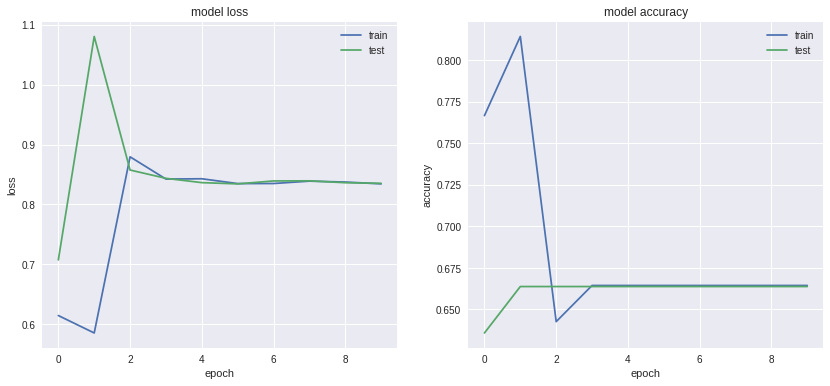

In [66]:
plot_history(history_momentum_99)

In [67]:
# #Train Data
predict_report(model_momentum_99, train_data_normal)

              precision    recall  f1-score   support

     Covid19       0.00      0.00      0.00       460
      Normal       0.00      0.00      0.00      1266
   Pneumonia       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
# #Test Data
predict_report(model_momentum_99, test_data_normal)

              precision    recall  f1-score   support

     Covid19       0.00      0.00      0.00       116
      Normal       0.00      0.00      0.00       317
   Pneumonia       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<p dir="rtl" style="text-align: right;">همانطور که گفته شد تکانه 0.5 اندکی سرعت همگرایی را افزایش میدهد و زودتر به دقت قابل قبولی میرسد (در این حالت با 10 ایپاک مقدار f1 برابر 93 شد) اما وقتی مقدار آن را زیاد کنیم (0.9 تا 0.99) در ابتدا دقت مدل پایین می آید و در نهایت باعث میشود که مدل اصلا همگرا نمیشود و در نتیجه عملکرد آن افت میکند و حتی در حالتی که ترین نمیشود همه عکس ها را ذات الریه تشخیص میدهد.</p>

<h2 dir="rtl" style="text-align: right;">IV.</h2>

<p dir="rtl" style="text-align: right;"><span>استفاده از adam باعث میشود که مدل سریع ترهمگرا شود و زیرا که در این حالت learning rate در حین ترین متغیر است و علاوه بر آن برای هر پارامترlearning rate متفاوتی فرض میکند و به طور کلی عملکرد بهتری نسبت به SGD دارد.</span></p>

In [69]:
model_adam = create_net(activation=activations.relu, optimizer=optimizers.Adam(learning_rate=0.001))

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              6554624   
_________________________________________________________________
dense_22 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


In [70]:
history_adam = model_adam.fit(train_data_normal, validation_data=test_data_normal, epochs=10)

Epoch 1/10
161/161 [==============================] - 170s 1s/step - loss: 2.2336 - accuracy: 0.6972 - val_loss: 0.2920 - val_accuracy: 0.8898
Epoch 2/10
161/161 [==============================] - 168s 1s/step - loss: 0.3244 - accuracy: 0.8793 - val_loss: 0.2436 - val_accuracy: 0.9130
Epoch 3/10
161/161 [==============================] - 165s 1s/step - loss: 0.2975 - accuracy: 0.8863 - val_loss: 0.2040 - val_accuracy: 0.9278
Epoch 4/10
161/161 [==============================] - 166s 1s/step - loss: 0.2743 - accuracy: 0.9016 - val_loss: 0.1908 - val_accuracy: 0.9309
Epoch 5/10
161/161 [==============================] - 165s 1s/step - loss: 0.2402 - accuracy: 0.9160 - val_loss: 0.2651 - val_accuracy: 0.8991
Epoch 6/10
161/161 [==============================] - 165s 1s/step - loss: 0.2699 - accuracy: 0.8996 - val_loss: 0.1737 - val_accuracy: 0.9410
Epoch 7/10
161/161 [==============================] - 163s 1s/step - loss: 0.2674 - accuracy: 0.9062 - val_loss: 0.1853 - val_accuracy: 0.9379

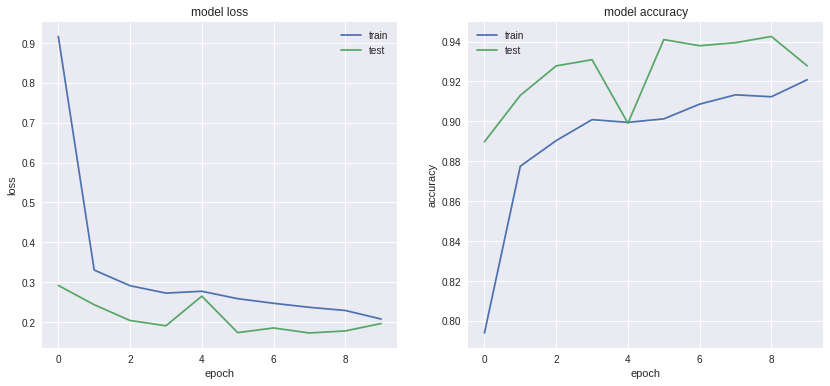

In [71]:
plot_history(history_adam)

In [72]:
# #Train Data
predict_report(model_adam, train_data_normal)

              precision    recall  f1-score   support

     Covid19       0.98      0.66      0.79       460
      Normal       0.90      0.89      0.89      1266
   Pneumonia       0.93      0.97      0.95      3418

    accuracy                           0.92      5144
   macro avg       0.93      0.84      0.88      5144
weighted avg       0.92      0.92      0.92      5144



In [73]:
# #Test Data
predict_report(model_adam, test_data_normal)

              precision    recall  f1-score   support

     Covid19       1.00      0.65      0.79       116
      Normal       0.89      0.92      0.91       317
   Pneumonia       0.94      0.97      0.95       855

    accuracy                           0.93      1288
   macro avg       0.94      0.85      0.88      1288
weighted avg       0.93      0.93      0.93      1288



## Part 7

<h2 dir="rtl" style="text-align: right;">I.</h2>

In [74]:
model_adam_20 = create_net(activation=activations.relu, optimizer=optimizers.Adam(learning_rate=0.001))

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 1024)              6554624   
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


In [75]:
history_adam_20 = model_adam_20.fit(train_data_normal, validation_data=test_data_normal, epochs=20)

Epoch 1/20
161/161 [==============================] - 168s 1s/step - loss: 1.5799 - accuracy: 0.6745 - val_loss: 0.2231 - val_accuracy: 0.9161
Epoch 2/20
161/161 [==============================] - 167s 1s/step - loss: 0.3164 - accuracy: 0.8814 - val_loss: 0.3345 - val_accuracy: 0.8703
Epoch 3/20
161/161 [==============================] - 167s 1s/step - loss: 0.2978 - accuracy: 0.8821 - val_loss: 0.1974 - val_accuracy: 0.9301
Epoch 4/20
161/161 [==============================] - 167s 1s/step - loss: 0.2425 - accuracy: 0.9117 - val_loss: 0.2945 - val_accuracy: 0.9185
Epoch 5/20
161/161 [==============================] - 166s 1s/step - loss: 0.2701 - accuracy: 0.8953 - val_loss: 0.2466 - val_accuracy: 0.9022
Epoch 6/20
161/161 [==============================] - 165s 1s/step - loss: 0.2416 - accuracy: 0.9127 - val_loss: 0.2053 - val_accuracy: 0.9224
Epoch 7/20
161/161 [==============================] - 163s 1s/step - loss: 0.2530 - accuracy: 0.9021 - val_loss: 0.2249 - val_accuracy: 0.9099

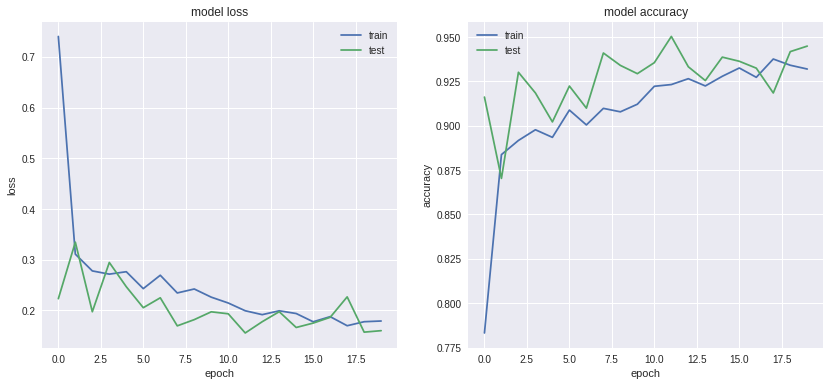

In [76]:
plot_history(history_adam_20)

In [77]:
# #Train Data
predict_report(model_adam_20, train_data_normal)

              precision    recall  f1-score   support

     Covid19       0.86      0.95      0.91       460
      Normal       0.90      0.92      0.91      1266
   Pneumonia       0.97      0.95      0.96      3418

    accuracy                           0.94      5144
   macro avg       0.91      0.94      0.93      5144
weighted avg       0.95      0.94      0.94      5144



In [78]:
# #Test Data
predict_report(model_adam_20, test_data_normal)

              precision    recall  f1-score   support

     Covid19       0.88      0.97      0.93       116
      Normal       0.90      0.93      0.91       317
   Pneumonia       0.97      0.95      0.96       855

    accuracy                           0.94      1288
   macro avg       0.92      0.95      0.93      1288
weighted avg       0.95      0.94      0.95      1288



<h2 dir="rtl" style="text-align: right;">II.</h2>

<p dir="rtl" style="text-align: right;"><span>با توجه به اینکه فرآیند یادگیری ما روی یک دیتاست محدود انجام میشود (کمبود داد) و یادگیری نیز براساس بروزرسانی پارامترها بر اساس خطای مدل است و لذا لازم است که داده ها را چندین بار از شبکه عبور داده تا شبکه بتواند trend کلی دیتاست را یادبگیرد و به اصطلاح generalize شود و واضح است که با یکبار عبور داده ها وزنها مقداراپتیمال خود را پیدا نمیکنند و در نتیجه لازم است شبکه برای چند epoch آموزش ببیند البته اگر تعداد epoch ها خیلی زیاد شود هم باعث overfitting میشود و شبکه دیتا train را حفظ میکند که نامطلوب است پس باید نقطه اپتیمال را پیدا کرد و بیشتر از آن مدل را ترین نکرد که به این کار اصطلاحا early stopping میگویند.</span></p>

## Part 8

<h2 dir="rtl" style="text-align: right;">I.</h2>

<address dir="rtl" style="text-align: right;">مشاهده میشود که دقت مدل روی 66% میماند و بیشتر نمیشود زیرا که مدل به ازای هر ورودی خروجی ثابت دارد و همه را ذات الریه تشخیص میدهد که علت آن استفاده از تابع خطای mse است که برای مسائل classification مناسب نیست زیرا که دراین نوع مسائل خروجی شبکه احتمال تعلق ورودی به هر کلاس است که مقداری بین 0 و 1 است که در این حالت خطا مقدار خیلی بزرگی پیدا نمیکند و لذا حتی وقتی مدل کاملا اشتباه تشخیص داده نیز به دلیل کوچک بودن مقدار خطا به درستی penalize نمیشود و پارامترهای مدل به درستی تنظیم نمیشوند لذا mse برای classification مناسب نیست اما برعکس با محاسبه cross entropy در حالتی که مدل به درستی تشخیص نداده میبینیم که مقدار خطا(loss) زیاد و قابل توجه میشود و به این ترتیب مدل به خوبی ترین شده و به دقت مطلوب میرسد.</address>

<h2 dir="rtl" style="text-align: right;">II.</h2>

<p dir="rtl" style="text-align: right;">از mse برای regression میتوان استفاده کرد نه classification&nbsp; زیرا که در این حالت خروجی شبکه از softmax عبور نمیکند تا احتمال بدست بیاید بلکه خود مقدار خروجی شبکه تخمینی از مقدار اصلی است که در این حالت اگر تخمین شبکه خیلی با مقدار اصلی فاصله داشته باشد mse زیاد شده و مذل را به درستی penalize کرده و در نهایت مدل به خوبی ترین میشود و به دقت مطلوب ما میرسد( در این حالت استفاده از cross entropy خوب نیست و عملکرد مطلوبی ندارد)</p>

In [80]:
model_mse = create_net(activation=activations.relu, optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.mse)

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 1024)              6554624   
_________________________________________________________________
dense_28 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


In [81]:
history_mse = model_mse.fit(train_data_normal, validation_data=test_data_normal, epochs=20)

Epoch 1/20
161/161 [==============================] - 166s 1s/step - loss: 0.2277 - accuracy: 0.6569 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 2/20
161/161 [==============================] - 163s 1s/step - loss: 0.2259 - accuracy: 0.6611 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 3/20
161/161 [==============================] - 165s 1s/step - loss: 0.2242 - accuracy: 0.6637 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 4/20
161/161 [==============================] - 163s 1s/step - loss: 0.2266 - accuracy: 0.6601 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 5/20
161/161 [==============================] - 165s 1s/step - loss: 0.2126 - accuracy: 0.6811 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 6/20
161/161 [==============================] - 162s 1s/step - loss: 0.2303 - accuracy: 0.6545 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 7/20
161/161 [==============================] - 161s 1s/step - loss: 0.2313 - accuracy: 0.6530 - val_loss: 0.2241 - val_accuracy: 0.6638

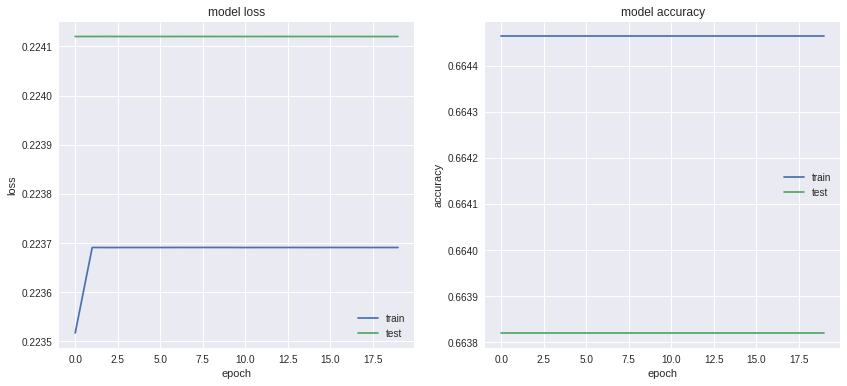

In [82]:
plot_history(history_mse)

In [83]:
predict_report(model_mse, train_data_normal)

              precision    recall  f1-score   support

     Covid19       0.00      0.00      0.00       460
      Normal       0.00      0.00      0.00      1266
   Pneumonia       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
predict_report(model_mse, test_data_normal)

              precision    recall  f1-score   support

     Covid19       0.00      0.00      0.00       116
      Normal       0.00      0.00      0.00       317
   Pneumonia       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Part 9


In [86]:
model_L2 = create_net(activation=activations.relu, optimizer=optimizers.Adam(learning_rate=0.001), bias_regularizer=regularizers.l2(0.0001), kernel_regularizer=regularizers.l2(0.0001))

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 1024)              6554624   
_________________________________________________________________
dense_31 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 3075      
Total params: 7,607,299
Trainable params: 7,607,299
Non-trainable params: 0
_________________________________________________________________


In [87]:
history_L2 = model_L2.fit(train_data_normal, validation_data=test_data_normal, epochs=20)

Epoch 1/20
161/161 [==============================] - 161s 999ms/step - loss: 1.9272 - accuracy: 0.6873 - val_loss: 0.4377 - val_accuracy: 0.9037
Epoch 2/20
161/161 [==============================] - 158s 983ms/step - loss: 0.4730 - accuracy: 0.8789 - val_loss: 0.3792 - val_accuracy: 0.9130
Epoch 3/20
161/161 [==============================] - 157s 976ms/step - loss: 0.4488 - accuracy: 0.8766 - val_loss: 0.3888 - val_accuracy: 0.8975
Epoch 4/20
161/161 [==============================] - 156s 974ms/step - loss: 0.4075 - accuracy: 0.8861 - val_loss: 0.3665 - val_accuracy: 0.8960
Epoch 5/20
161/161 [==============================] - 160s 992ms/step - loss: 0.3947 - accuracy: 0.8819 - val_loss: 0.3255 - val_accuracy: 0.9092
Epoch 6/20
161/161 [==============================] - 157s 980ms/step - loss: 0.3404 - accuracy: 0.9050 - val_loss: 0.2756 - val_accuracy: 0.9278
Epoch 7/20
161/161 [==============================] - 157s 980ms/step - loss: 0.3373 - accuracy: 0.8960 - val_loss: 0.2519 -

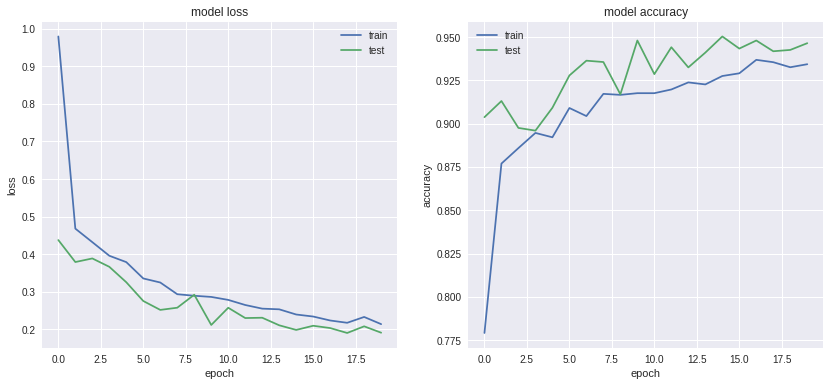

In [88]:
plot_history(history_L2)

In [89]:
# #Train Data
predict_report(model_L2, train_data_normal)

              precision    recall  f1-score   support

     Covid19       0.96      0.94      0.95       460
      Normal       0.95      0.88      0.91      1266
   Pneumonia       0.95      0.98      0.97      3418

    accuracy                           0.95      5144
   macro avg       0.95      0.93      0.94      5144
weighted avg       0.95      0.95      0.95      5144



In [90]:
# #Test Data
predict_report(model_L2, test_data_normal)

              precision    recall  f1-score   support

     Covid19       0.94      0.91      0.92       116
      Normal       0.93      0.90      0.91       317
   Pneumonia       0.96      0.97      0.96       855

    accuracy                           0.95      1288
   macro avg       0.94      0.92      0.93      1288
weighted avg       0.95      0.95      0.95      1288



<h2 dir="rtl" style="text-align: right;">II.</h2>

<p dir="rtl" style="text-align: right;">به طور کلی با استفاده از regularization جلوی بزرگ شدن بیش از حد ضرایب در شبکه های عصبی را میگیرند زیرا که ضرایب بزرگ باعث ناپایداری سیستم میشود زیرا که با اندکی تغییر در ورودی (تغییرات ناشی از نویزو...) خروجی به شدت دست خوش تغییر میشود اگر ضرایب خیلی بزرگ باشند. همچنین جلوی gradient explosion را هم میگیرد. نکته حائز اهمیت دیگری که وجود دارد این است که این کار باعث جلوگیری از overfit شدن شبکه هم میشود.</p>
<p dir="rtl" style="text-align: right;">برای regularization روش های مختلفی وجود دارد که یکی از آنها L2 است که در این روش برای جلوگیری از رشد بیش از حد ضرایب مجموع توان دوی آنهارا با تابع loss(خطا) جمع میکنند تا در صورتی که پارامترها و وزنها خیلی بزرگ شدند خطا بزرگ شود و شبکه به خوبی penalize شود...&nbsp;</p>

<h2 dir="rtl" style="text-align: right;">III.</h2>

<p dir="rtl" style="text-align: right;">روش دیگری که وجود دارد drop out است؛ همانطور که گفتیم شبکه های عصبی (به دلیل complex بودن) کاملا پتانسیل اورفیت شدن را دارند اما مشابه آنچه در درخت تصمیم و جنگل تصادفی دیدیدم در اینجا هم اگر بتوان تعدادی شبکه عصبی مختلف را با هایپرپارامتر مختلف استفاده کرد و از نتیجه همه آنها برا تخمین استفاده کرد (روش ensmeble) به دقت بسیار خوبی دست پیدا میکنیم اما به دلیل اینکه پردازش سنگینی نیاز دارند شبکه های عصبی این کار عملا امکانپذیر نیست و لذا به جای آن در روش drop out به صورت تصادفی نورون هایی را دراپ میکنیم که در عمل مشابه این است که یک شبکه با ساختار متفاوت(تعداد نورون متفاوت و...) استفاده کرده ایم و به نوعی انگار که این شبکه ها به صورت موازی با هم در حال ترین شدن هستند و در نهایت باعث میشود که مدل بهتر ترین شده و ترند کلی داده ها را یادبگیرد و اورفیت نشود و جنرالایز شود البته dropout rate را باید به درستی تنظیم کرد تا عملکرد کلی شبکه مختل نشود.</p>

In [94]:
model_dropout = create_net(activation=activations.relu, optimizer=optimizers.Adam(learning_rate=0.001), Dropout=True)

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 1024)              6554624   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 307

In [95]:
history_dropout = model_dropout.fit(train_data_normal, validation_data=test_data_normal, epochs=20)

Epoch 1/20
161/161 [==============================] - 157s 975ms/step - loss: 1.7761 - accuracy: 0.6963 - val_loss: 0.3890 - val_accuracy: 0.8564
Epoch 2/20
161/161 [==============================] - 155s 962ms/step - loss: 0.3499 - accuracy: 0.8675 - val_loss: 0.3015 - val_accuracy: 0.8874
Epoch 3/20
161/161 [==============================] - 155s 963ms/step - loss: 0.3217 - accuracy: 0.8749 - val_loss: 0.2463 - val_accuracy: 0.8998
Epoch 4/20
161/161 [==============================] - 154s 959ms/step - loss: 0.2950 - accuracy: 0.8906 - val_loss: 0.2153 - val_accuracy: 0.9200
Epoch 5/20
161/161 [==============================] - 153s 951ms/step - loss: 0.2554 - accuracy: 0.9006 - val_loss: 0.2305 - val_accuracy: 0.9130
Epoch 6/20
161/161 [==============================] - 153s 949ms/step - loss: 0.2582 - accuracy: 0.9061 - val_loss: 0.1751 - val_accuracy: 0.9387
Epoch 7/20
161/161 [==============================] - 153s 949ms/step - loss: 0.2659 - accuracy: 0.8969 - val_loss: 0.2805 -

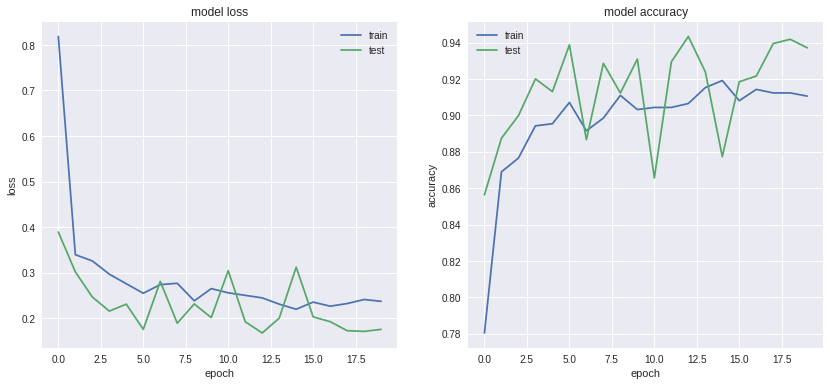

In [96]:
plot_history(history_dropout)

In [97]:
# #Train Data
predict_report(model_dropout, train_data_normal)

              precision    recall  f1-score   support

     Covid19       0.96      0.83      0.89       460
      Normal       0.89      0.88      0.89      1266
   Pneumonia       0.95      0.97      0.96      3418

    accuracy                           0.93      5144
   macro avg       0.93      0.90      0.91      5144
weighted avg       0.93      0.93      0.93      5144



In [98]:
# #Test Data
predict_report(model_dropout, test_data_normal)

              precision    recall  f1-score   support

     Covid19       0.98      0.80      0.88       116
      Normal       0.87      0.92      0.90       317
   Pneumonia       0.96      0.96      0.96       855

    accuracy                           0.94      1288
   macro avg       0.94      0.89      0.91      1288
weighted avg       0.94      0.94      0.94      1288

